# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
project_data = pd.read_csv('/content/drive/My Drive/train_data.csv')
resource_data = pd.read_csv('/content/drive/My Drive/resources.csv')

In [0]:
print("Number of data points in project data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in project data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [0]:
print("Number of data points in resource data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in resource data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95

In [0]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 preprocessing of `project_grade_category`

In [0]:
grades = list(project_data['project_grade_category'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

grade_list = []
for j in grades:
    temp = ""
    j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
    temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
    temp = temp.replace('-','_')
    grade_list.append(temp.strip())


project_data['grades'] = grade_list
project_data.drop(['project_grade_category'], axis=1, inplace=True)

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [0]:
project_data.head(2)

Unnamed: 0  ...                                              essay
0      160221  ...  My students are English learners that are work...
1      140945  ...  Our students arrive to our school eager to lea...

[2 rows x 20 columns]

In [0]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't",'no', 'nor', 'not']

In [0]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    # https://gist.github.com/sebleier/554280
    sentance = re.sub('[^A-Za-z0-9]+', ' ', sentance)
    sentance = ' '.join(e for e in sentance.lower().split() if e not in stopwords)
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    
    
    preprocessed_essays.append(sent.strip())
    
project_data['clean_essay'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)

100%|██████████| 109248/109248 [00:55<00:00, 1970.21it/s]


In [0]:
# after preprocesing
preprocessed_essays[20000]

'kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism eager beavers always strive work hardest working past limitations r n r nthe materials ones seek students teach title school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore ever felt like ants pants needed groove move meeting kids feel time want able move learn say wobble chairs answer love develop core enhances gross motor turn fine motor skills r nthey also want learn games kids want sit worksheets want learn count jumping playing physical engagement key success number toss color shape mats make happen students forget work fun 6 year old deserves nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [0]:
# similarly you can preprocess the titles also

from tqdm import tqdm
preprocessed_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    # https://gist.github.com/sebleier/554280
    sentance = re.sub('[^A-Za-z0-9]+', ' ', sentance)
    sentance = ' '.join(e for e in sentance.lower().split() if e not in stopwords)
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    
    
    preprocessed_title.append(sent.strip())
    
project_data['clean_title'] = preprocessed_title
project_data.drop(['project_title'], axis=1, inplace=True)

100%|██████████| 109248/109248 [00:02<00:00, 43434.60it/s]


In [0]:
preprocessed_title[20000]

'need move input'

In [0]:
#https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna("N/A") 
project_data['project_essay_3']=project_data['project_essay_3'].fillna("N/A")
project_data['project_essay_4']=project_data['project_essay_4'].fillna("N/A")

## 1.5 Preparing data for models

In [0]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'grades', 'clean_essay', 'clean_title'],
      dtype='object')

In [0]:
y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects that are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects that are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")


Number of projects that are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects that are not approved for funding  16542 , ( 15.141695957820739 %)


we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

## Splitting Data into Train,CV and Test

In [0]:
from sklearn.model_selection import train_test_split

y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved'], axis=1)
X.head(1)

Unnamed: 0  ...                                clean_title
0      160221  ...  educational support english learners home

[1 rows x 19 columns]

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, stratify=y)


In [0]:
print(X_train.shape)
print(X_test.shape)


(76473, 19)
(32775, 19)


In [0]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 11579, 1: 64894}

### Up Sampling the X_train data

In [0]:
#https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.RandomOverSampler.html
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
X_df=pd.DataFrame(X_res)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [0]:
#https://stackoverflow.com/questions/19991338/creating-dictionary-from-numpy-array?rq=1
col=dict(enumerate(X_train.columns.values))
X_train=X_df.rename(columns=col)
y_train=y_res
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 64894, 1: 64894}

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [0]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer

vect_cat = CountVectorizer()
vect_cat.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_cat_ohe = vect_cat.transform(X_train['clean_categories'].values)
X_test_clean_cat_ohe = vect_cat.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_cat_ohe.shape, y_train.shape)
print(X_test_clean_cat_ohe.shape, y_test.shape)
print(vect_cat.get_feature_names())
print("="*100)

After vectorizations
(129788, 9) (129788,)
(32775, 9) (32775,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [0]:
# we use count vectorizer to convert the values into one 

vect_subcat = CountVectorizer()
vect_subcat.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcat_ohe = vect_subcat.transform(X_train['clean_subcategories'].values)
X_test_clean_subcat_ohe = vect_subcat.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcat_ohe.shape, y_train.shape)
print(X_test_clean_subcat_ohe.shape, y_test.shape)
print(vect_subcat.get_feature_names())
print("="*100)

After vectorizations
(129788, 30) (129788,)
(32775, 30) (32775,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [0]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also
# we use count vectorizer to convert the values into one 
vect_state = CountVectorizer()
vect_state.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vect_state.transform(X_train['school_state'].values)
X_test_state_ohe = vect_state.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vect_state.get_feature_names())
print("="*100)

After vectorizations
(129788, 51) (129788,)
(32775, 51) (32775,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [0]:

vect_prefix = CountVectorizer()
vect_prefix.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vect_prefix.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vect_prefix.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vect_prefix.get_feature_names())
print("="*100)

After vectorizations
(129788, 5) (129788,)
(32775, 5) (32775,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [0]:
vect_grade = CountVectorizer()
vect_grade.fit(X_train['grades'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vect_grade.transform(X_train['grades'].values)
X_test_grade_ohe = vect_grade.transform(X_test['grades'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vect_grade.get_feature_names())
print("="*100)

After vectorizations
(129788, 4) (129788,)
(32775, 4) (32775,)
['grades3_5', 'grades6_8', 'grades9_12', 'gradesprek_2']


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [0]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).

vect_essay_bow = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vect_essay_bow.fit(X_train['clean_essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vect_essay_bow.transform(X_train['clean_essay'].values)
X_test_essay_bow = vect_essay_bow.transform(X_test['clean_essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(129788, 5000) (129788,)
(32775, 5000) (32775,)


In [0]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vect_title_bow = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vect_title_bow.fit(X_train['clean_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vect_title_bow.transform(X_train['clean_title'].values)
X_test_title_bow = vect_title_bow.transform(X_test['clean_title'].values)

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_test_title_bow.shape, y_test.shape)
print("="*100)



After vectorizations
(129788, 5000) (129788,)
(32775, 5000) (32775,)


#### 1.5.2.2 TFIDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect_essay_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vect_essay_tfidf.fit(X_train['clean_essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vect_essay_tfidf.transform(X_train['clean_essay'].values)
X_test_essay_tfidf = vect_essay_tfidf.transform(X_test['clean_essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(129788, 5000) (129788,)
(32775, 5000) (32775,)


In [0]:

vect_title_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vect_title_tfidf.fit(X_train['clean_title'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vect_title_tfidf.transform(X_train['clean_title'].values)
X_test_title_tfidf = vect_title_tfidf.transform(X_test['clean_title'].values)

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(129788, 5000) (129788,)
(32775, 5000) (32775,)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [0]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('/content/drive/My Drive/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_train_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_train_essay.append(vector)

print(len(avg_w2v_train_essay))
print(len(avg_w2v_train_essay[0]))

100%|██████████| 129788/129788 [00:37<00:00, 3470.14it/s]

129788
300


In [0]:
# average Word2Vec on Test Essay
# compute average word2vec for each review.
avg_w2v_test_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_test_essay.append(vector)

print(len(avg_w2v_test_essay))
print(len(avg_w2v_test_essay[0]))

100%|██████████| 32775/32775 [00:09<00:00, 3432.95it/s]

32775
300


In [0]:
# average Word2Vec on Train Title
# compute average word2vec for each review.

avg_w2v_train_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_train_title.append(vector)

print(len(avg_w2v_train_title))
print(len(avg_w2v_train_title[0]))

100%|██████████| 129788/129788 [00:01<00:00, 67689.05it/s]

129788
300


In [0]:
# average Word2Vec on Test Title
# compute average word2vec for each review.

avg_w2v_test_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_test_title.append(vector)

print(len(avg_w2v_test_title))
print(len(avg_w2v_test_title[0]))

100%|██████████| 32775/32775 [00:00<00:00, 68206.11it/s]

32775
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [0]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# TFIDF Word2Vec on Train Essay
# compute average word2vec for each review.
tfidf_w2v_train_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_essay.append(vector)

print(len(tfidf_w2v_train_essay))
print(len(tfidf_w2v_train_essay[0]))

100%|██████████| 129788/129788 [03:57<00:00, 546.47it/s]

129788
300


In [0]:
# TFIDF Word2Vec on Test Essay
# compute average word2vec for each review.
tfidf_w2v_test_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test_essay.append(vector)

print(len(tfidf_w2v_test_essay))
print(len(tfidf_w2v_test_essay[0]))

100%|██████████| 32775/32775 [01:02<00:00, 524.16it/s]

32775
300


In [0]:
# Similarly you can vectorize for title also
tfidf_title_model = TfidfVectorizer()
tfidf_title_model.fit(X_train['clean_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_title_model.get_feature_names(), list(tfidf_title_model.idf_)))
tfidf_title_words = set(tfidf_title_model.get_feature_names())

In [0]:
# TFIDF Word2Vec on Train Title
# compute average word2vec for each review.
tfidf_w2v_train_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['clean_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_title_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_train_title.append(vector)

print(len(tfidf_w2v_train_title))
print(len(tfidf_w2v_train_title[0]))

100%|██████████| 129788/129788 [00:04<00:00, 29511.11it/s]

129788
300


In [0]:
# TFIDF Word2Vec on Test Title
# compute average word2vec for each review.
tfidf_w2v_test_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['clean_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_title_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_test_title.append(vector)

print(len(tfidf_w2v_test_title))
print(len(tfidf_w2v_test_title[0]))

100%|██████████| 32775/32775 [00:01<00:00, 26298.53it/s]

32775
300


### 1.5.3 Vectorizing Numerical features

####1.5.3.1 Vectorizing Price

In [0]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.

X_train_price_std = price_scalar.transform(X_train['price'].values.reshape(-1,1))
X_test_price_std = price_scalar.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_std.shape, y_train.shape)
print(X_test_price_std.shape, y_test.shape)
print("="*100)
print(X_train_price_std)

Mean : 323.3010856165439, Standard deviation : 377.79228623196303
After vectorizations
(129788, 1) (129788,)
(32775, 1) (32775,)
[[ 1.78854608]
 [-0.33354595]
 [ 0.116675  ]
 ...
 [-0.50009249]
 [ 0.05200983]
 [ 0.05735669]]


####1.5.3.2 Vectorizing Teacher number of previously posted projects

In [0]:
tp_scalar = StandardScaler()
tp_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {tp_scalar.mean_[0]}, Standard deviation : {np.sqrt(tp_scalar.var_[0])}")

# Now standardize the data with above maen and variance.

X_train_tp_std = tp_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_tp_std = tp_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_tp_std.shape, y_train.shape)
print(X_test_tp_std.shape, y_test.shape)
print("="*100)
print(X_train_tp_std)

Mean : 9.345047307917527, Standard deviation : 24.113713403743223
After vectorizations
(129788, 1) (129788,)
(32775, 1) (32775,)
[[-0.38754078]
 [-0.3460706 ]
 [-0.38754078]
 ...
 [-0.38754078]
 [-0.26313024]
 [-0.38754078]]


####1.5.3.3 Vectorizing Quantity

In [0]:
quantity_scalar = StandardScaler()
quantity_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.

X_train_quantity_std = quantity_scalar.transform(X_train['quantity'].values.reshape(-1,1))
X_test_quantity_std = quantity_scalar.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_quantity_std.shape, y_train.shape)
print(X_test_quantity_std.shape, y_test.shape)
print("="*100)
print(X_train_quantity_std)

Mean : 18.312840940610844, Standard deviation : 27.297041535432264
After vectorizations
(129788, 1) (129788,)
(32775, 1) (32775,)
[[-0.63423873]
 [-0.26789866]
 [-0.30453267]
 ...
 [ 1.63706968]
 [-0.30453267]
 [-0.12136264]]


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

###<font color='red'>Set 1</font>

In [0]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr = hstack(( X_train_state_ohe,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_essay_bow,X_train_title_bow, X_train_price_std,X_train_tp_std)).tocsr()
X_te = hstack(( X_test_state_ohe,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_essay_bow,X_test_title_bow, X_test_price_std,X_test_tp_std)).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(129788, 10101) (129788,)
(32775, 10101) (32775,)


In [0]:
#Making a list of all feature names
feature_names_bow=vect_state.get_feature_names()+vect_cat.get_feature_names()+vect_subcat.get_feature_names()+vect_prefix.get_feature_names()+vect_grade.get_feature_names()+vect_essay_bow.get_feature_names()+vect_title_bow.get_feature_names()
feature_names_bow.extend(["price","teacher_previously_posted_projects"])
len(feature_names_bow)

10101

### <font color='red'>Set 2</font>

In [0]:
X_2tr = hstack(( X_train_state_ohe,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_teacher_ohe, X_train_grade_ohe,X_train_essay_tfidf,X_train_title_tfidf, X_train_price_std,X_train_tp_std)).tocsr()
X_2te = hstack(( X_test_state_ohe,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_teacher_ohe, X_test_grade_ohe,X_test_essay_tfidf,X_test_title_tfidf, X_test_price_std,X_test_tp_std)).tocsr()

print("Final Data matrix")
print(X_2tr.shape, y_train.shape)
print(X_2te.shape, y_test.shape)
print("="*100)

Final Data matrix
(129788, 10101) (129788,)
(32775, 10101) (32775,)


In [0]:
#Making a list of all feature names
feature_names_tfidf=vect_state.get_feature_names()+vect_cat.get_feature_names()+vect_subcat.get_feature_names()+vect_prefix.get_feature_names()+vect_grade.get_feature_names()+vect_essay_tfidf.get_feature_names()+vect_title_tfidf.get_feature_names()
feature_names_tfidf.extend(["price","teacher_previously_posted_projects"])
len(feature_names_tfidf)

10101

### <font color='red'>Set 3</font>

In [0]:
X_3tr = hstack(( X_train_state_ohe,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_teacher_ohe, X_train_grade_ohe,avg_w2v_train_essay,avg_w2v_train_title, X_train_price_std,X_train_tp_std)).tocsr()
X_3te = hstack(( X_test_state_ohe,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_teacher_ohe, X_test_grade_ohe,avg_w2v_test_essay,avg_w2v_test_title, X_test_price_std,X_test_tp_std)).tocsr()

print("Final Data matrix")
print(X_3tr.shape, y_train.shape)
print(X_3te.shape, y_test.shape)
print("="*100)

Final Data matrix
(129788, 701) (129788,)
(32775, 701) (32775,)


### <font color='red'>Set 4</font>

In [0]:
X_4tr = hstack(( X_train_state_ohe,X_train_clean_cat_ohe,X_train_clean_subcat_ohe, X_train_teacher_ohe, X_train_grade_ohe,tfidf_w2v_train_essay,tfidf_w2v_train_title, X_train_price_std,X_train_tp_std)).tocsr()
X_4te = hstack(( X_test_state_ohe,X_test_clean_cat_ohe,X_test_clean_subcat_ohe, X_test_teacher_ohe, X_test_grade_ohe,tfidf_w2v_test_essay,tfidf_w2v_test_title, X_test_price_std,X_test_tp_std)).tocsr()

print("Final Data matrix")
print(X_4tr.shape, y_train.shape)
print(X_4te.shape, y_test.shape)
print("="*100)

Final Data matrix
(129788, 701) (129788,)
(32775, 701) (32775,)


# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
def batch_predict(clf, data):
    #roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    #not the predicted outputs
    y_data_pred =[]
    tr_loop = data.shape[0] - data.shape[0]%1000
    #consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    #in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    #we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight = 'balanced',min_samples_leaf=5)
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split':[5,10,100,500]}
clf = GridSearchCV(dt, parameters, cv=3, return_train_score=True, scoring='roc_auc', n_jobs=-1,verbose=10)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_max_depth'])



Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 47.3min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed: 51.7min finished


In [0]:
results

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0        1.366916      0.019865  ...          0.549673         0.000195
1        1.339480      0.078413  ...          0.549673         0.000195
2        1.318425      0.016757  ...          0.549673         0.000195
3        1.296856      0.023681  ...          0.549673         0.000195
4        5.521526      0.201890  ...          0.639367         0.001934
5        5.500413      0.190152  ...          0.639367         0.001934
6        5.382740      0.226681  ...          0.638911         0.001883
7        5.294494      0.211141  ...          0.638409         0.001906
8       24.186695      1.708721  ...          0.721126         0.003605
9       24.519918      1.632315  ...          0.721096         0.003611
10      20.994883      1.345246  ...          0.713133         0.003485
11      16.363003      0.713168  ...          0.699648         0.001500
15     107.629838      5.509138  ...          0.844377         0.003814
14     176.212094     11.057206  ...          0.911103         0.007110
13     228.767109     13.570897  ...          0.961905         0.006113
12     228.299374     12.239722  ...          0.962131         0.006198
16     305.495337     10.454646  ...          0.988682         0.001617
17     305.659993     12.813743  ...          0.987948         0.002593
18     239.783587     13.343856  ...          0.941334         0.002894
19     166.203969      7.661221  ...          0.872457         0.003052
20     332.936159      1.961278  ...          0.991768         0.000149
21     330.780095      1.535077  ...          0.991748         0.000228
22     264.297145      6.147580  ...          0.944236         0.001069
23     192.365776      8.520561  ...          0.877675         0.002546
24     336.572183      2.388797  ...          0.991631         0.000226
25     332.670339      2.278687  ...          0.991679         0.000073
26     258.487364      1.398421  ...          0.944765         0.001564
27     185.055875      5.868629  ...          0.876390         0.003452

[28 rows x 18 columns]

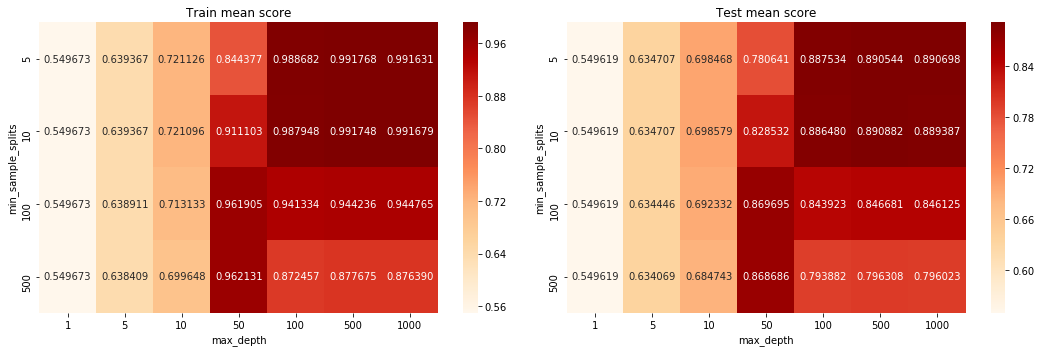

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
tr_auc = np.asarray(results['mean_train_score']).reshape(7,4).T
te_auc = np.asarray(results['mean_test_score']).reshape(7,4).T
max_depth=[1, 5, 10, 50, 100, 500, 1000]
min_samples_split=[5,10,100,500]

f, axes = plt.subplots(1, 2,figsize=(15,5))

sns.heatmap(tr_auc, annot=True,square=False,cbar=True,cmap='OrRd',fmt='f',xticklabels=max_depth, yticklabels=min_samples_split,ax=axes[0])
sns.heatmap(te_auc, annot=True,square=False,cbar=True,cmap='OrRd',fmt='f',xticklabels=max_depth, yticklabels=min_samples_split,ax=axes[1])
#axes[0].yaxis.set_major_locator(ticker.IndexLocater(base=1, offset=0.5))
axes[0].set_title('Train mean score')
axes[1].set_title('Test mean score')

axes[0].set(xlabel='max_depth', ylabel='min_sample_splits')
axes[1].set(xlabel='max_depth', ylabel='min_sample_splits')

plt.tight_layout()

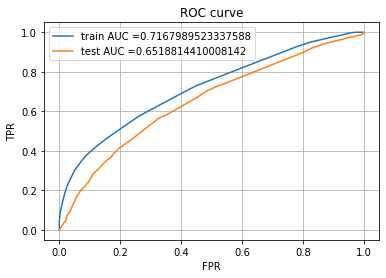

In [0]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
best_d1=10
best_s1=10

dt = DecisionTreeClassifier(max_depth = best_d1, min_samples_split = best_s1, class_weight = 'balanced')
dt.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(dt, X_tr)    
y_test_pred = batch_predict(dt, X_te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

auc1=str(auc(test_fpr, test_tpr))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.42557065489053564 for threshold 0.459


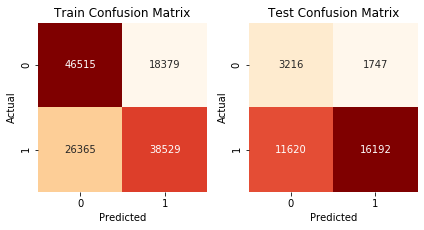

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

tr_cm = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
te_cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://seaborn.pydata.org/examples/distplot_options.html
#https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html

f, axes = plt.subplots(1, 2)

sns.heatmap(tr_cm, annot=True,square=True,cbar=False,cmap='OrRd',fmt="d", ax=axes[0])
sns.heatmap(te_cm, annot=True,square=True,cbar=False,cmap='OrRd',fmt="d", ax=axes[1])
axes[0].set_title('Train Confusion Matrix')
axes[1].set_title('Test Confusion Matrix')

axes[0].set(xlabel='Predicted', ylabel='Actual')
axes[1].set(xlabel='Predicted', ylabel='Actual')

plt.tight_layout()

In [0]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.vstack.html

from scipy.sparse import coo_matrix, vstack

print("Number of false positive points :", te_cm[0][1])
pred =  np.asarray(predict_with_best_t(y_test_pred, best_t)) #Predicting Test data
a=np.array([y_test,pred])                                    #Combine and convert to array the actual values and predicted values
print(a.shape)
fp_data=[]

for i in range(a.shape[1]):
  if (a[0][i] == 0 and a[1][i] == 1):
    fp_data.append(X_te[i].todense())                      #Stacking all the false positive data points

fp_data=np.asarray(fp_data)
#https://stackoverflow.com/questions/45257971/how-to-reduce-a-3-dim-numpy-array-to-2-dim
fp_data=np.asarray(fp_data.reshape(-1, fp_data.shape[-1]))
print("shape of False positive data points -",fp_data.shape)


Number of false positive points : 1747
(2, 32775)
shape of False positive data points - (1747, 10101)


####Word Cloud of feature names

In [0]:
#Inverse Transform of the essay
ebow_inv=vect_essay_bow.inverse_transform(fp_data[:,-10002:-5002])
essay_bow=[]
for i in ebow_inv:
  essay_bow.extend(i)


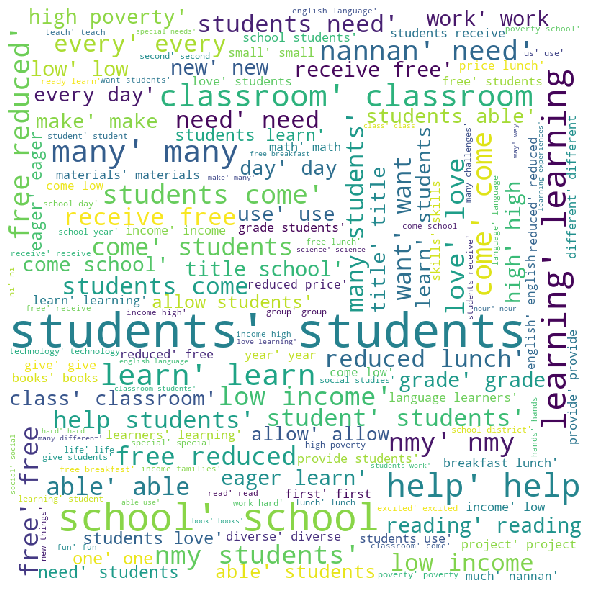

In [0]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(str(essay_bow)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### Box Plot of Price

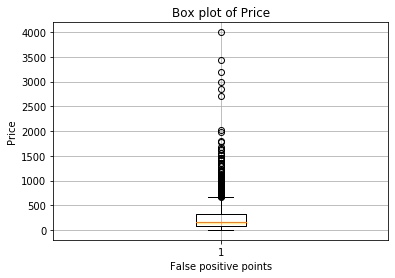

In [0]:
#Inverse transform of standard scalar to get original values
price_in = np.floor(price_scalar.inverse_transform(fp_data[:,-2]))  #-2 because price column is present in last second column in fp_data

#https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
plt.boxplot(price_in)
plt.title('Box plot of Price')
plt.xlabel('False positive points')
plt.ylabel('Price')
plt.grid()
plt.show()

#### PDF of Teacher Number of previously posted projects

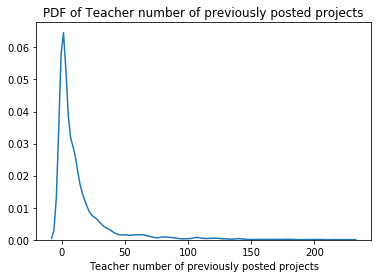

In [0]:
#https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
tp_in = np.floor(tp_scalar.inverse_transform(fp_data[:,-1]))    #-1 for last column in fp_data

sns.distplot(tp_in,hist=False,kde=True)
plt.title('PDF of Teacher number of previously posted projects')
plt.xlabel('Teacher number of previously posted projects')
plt.show()

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

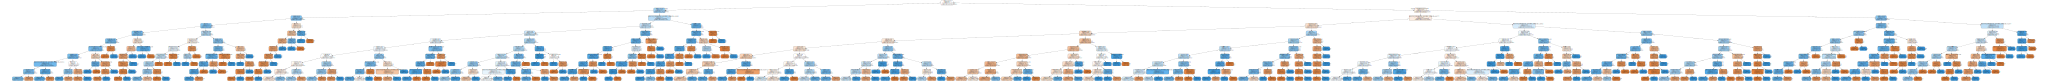

In [0]:
# Please write all the code with proper documentation
#https://scikit-learn.org/stable/modules/tree.html
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(dt, out_file=None, 
                       
                     filled=True, rounded=True,feature_names= feature_names_bow,
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight = 'balanced',min_samples_leaf=5)
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split':[5,10,100,500]}
clf = GridSearchCV(dt, parameters, cv=3, return_train_score=True, scoring='roc_auc', n_jobs=-1,verbose=10)
clf.fit(X_2tr, y_train)

results_2 = pd.DataFrame.from_dict(clf.cv_results_)
results_2 = results_2.sort_values(['param_max_depth'])



Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 53.5min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed: 58.3min finished


In [0]:
results_2.head()

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0       2.879180      0.019355  ...          0.549673         0.000195
1       2.818931      0.058016  ...          0.549673         0.000195
2       2.778714      0.018036  ...          0.549673         0.000195
3       2.791785      0.008093  ...          0.549673         0.000195
4      12.571376      0.081035  ...          0.644326         0.001227

[5 rows x 18 columns]

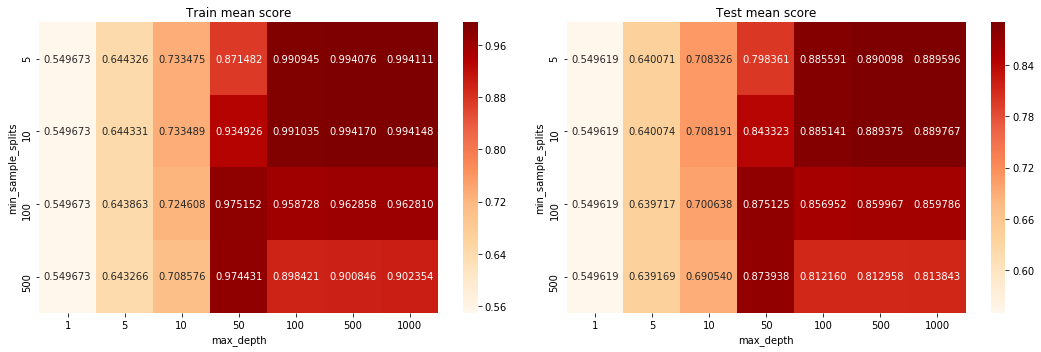

In [0]:
tr2_auc = np.asarray(results_2['mean_train_score']).reshape(7,4).T
te2_auc = np.asarray(results_2['mean_test_score']).reshape(7,4).T
max_depth=[1, 5, 10, 50, 100, 500, 1000]
min_samples_split=[5,10,100,500]

f, axes = plt.subplots(1, 2,figsize=(15,5))

sns.heatmap(tr2_auc, annot=True,square=False,cbar=True,cmap='OrRd',fmt='f',xticklabels=max_depth, yticklabels=min_samples_split,ax=axes[0])
sns.heatmap(te2_auc, annot=True,square=False,cbar=True,cmap='OrRd',fmt='f',xticklabels=max_depth, yticklabels=min_samples_split,ax=axes[1])

axes[0].set_title('Train mean score')
axes[1].set_title('Test mean score')

axes[0].set(xlabel='max_depth', ylabel='min_sample_splits')
axes[1].set(xlabel='max_depth', ylabel='min_sample_splits')

plt.tight_layout()

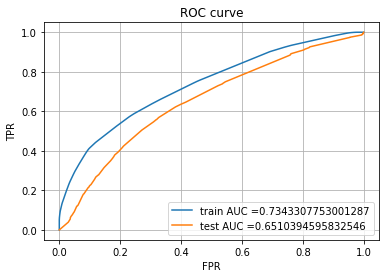

In [0]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
best_d2=10
best_s2=5

dt = DecisionTreeClassifier(max_depth = best_d2, min_samples_split = best_s2, class_weight = 'balanced')
dt.fit(X_2tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(dt, X_2tr)    
y_test_pred = batch_predict(dt, X_2te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

auc2=str(auc(test_fpr, test_tpr))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.4439077541074736 for threshold 0.46


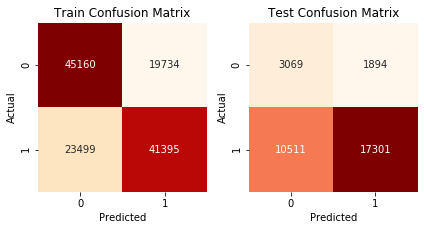

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

tr_cm = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
te_cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://seaborn.pydata.org/examples/distplot_options.html
#https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html

f, axes = plt.subplots(1, 2)

sns.heatmap(tr_cm, annot=True,square=True,cbar=False,cmap='OrRd',fmt="d", ax=axes[0])
sns.heatmap(te_cm, annot=True,square=True,cbar=False,cmap='OrRd',fmt="d", ax=axes[1])
axes[0].set_title('Train Confusion Matrix')
axes[1].set_title('Test Confusion Matrix')

axes[0].set(xlabel='Predicted', ylabel='Actual')
axes[1].set(xlabel='Predicted', ylabel='Actual')

plt.tight_layout()

### <font color='red'>Set 5</font>

In [0]:
fi = dt.feature_importances_
fi=np.argsort(fi)
fi=fi[-5000:]
print(fi.shape)


X_5tr=np.zeros((0,0))
X_5te=np.zeros((0,0))

for i in tqdm(fi):
  X_5tr = hstack((X_5tr,X_2tr[:,i]))
  X_5te = hstack((X_5te,X_2te[:,i]))

X_5tr=X_5tr.tocsr()
X_5te=X_5te.tocsr()
print(X_5tr.shape)
print(X_5te.shape)

  0%|          | 2/5000 [00:00<05:56, 14.01it/s]

(5000,)


100%|██████████| 5000/5000 [15:28<00:00,  2.69it/s]


(129788, 5000)
(32775, 5000)


In [0]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.vstack.html

from scipy.sparse import coo_matrix, vstack

print("Number of false positive points :", te_cm[0][1])
pred =  np.asarray(predict_with_best_t(y_test_pred, best_t)) #Predicting Test data
a=np.array([y_test,pred])                                    #Combine and convert to array the actual values and predicted values
print(a.shape)
fp_data=[]

for i in range(a.shape[1]):
  if (a[0][i] == 0 and a[1][i] == 1):
    fp_data.append(X_2te[i].todense())                      #Stacking all the false positive data points

fp_data=np.asarray(fp_data)
#https://stackoverflow.com/questions/45257971/how-to-reduce-a-3-dim-numpy-array-to-2-dim
fp_data=np.asarray(fp_data.reshape(-1, fp_data.shape[-1]))
print("Shape of False positive data points -",fp_data.shape)


Number of false positive points : 1894
(2, 32775)
Shape of False positive data points - (1894, 10101)


####Word Cloud of feature names

In [0]:
essay_inv = vect_essay_tfidf.inverse_transform(fp_data[:,-10002:-5002])
essay_tfidf=[]
for i in essay_inv:
  essay_tfidf.extend(i)


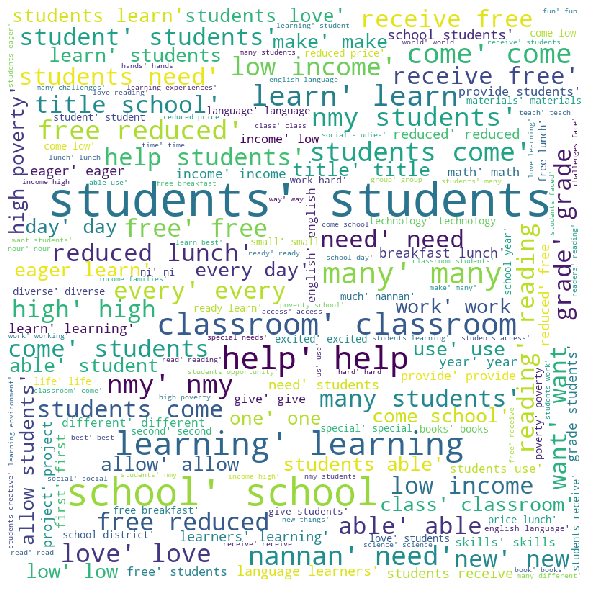

In [0]:
#https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(str(essay_tfidf)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#### Box Plot of Price

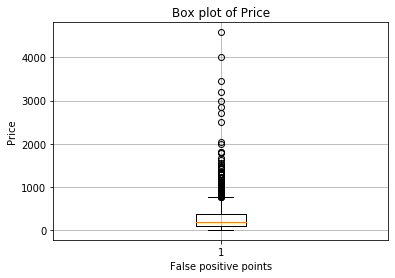

In [0]:
#Inverse transform of standard scalar to get original values
price_in = np.floor(price_scalar.inverse_transform(fp_data[:,-2]))  #-2 because price column is present in last second column in fp_data

#https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
plt.boxplot(price_in)
plt.title('Box plot of Price')
plt.xlabel('False positive points')
plt.ylabel('Price')
plt.grid()
plt.show()

#### PDF of Teacher Number of previously posted projects

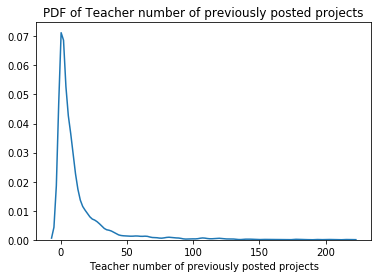

In [0]:
#https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
tp_in = np.floor(tp_scalar.inverse_transform(fp_data[:,-1]))    #-1 for last column in fp_data

sns.distplot(tp_in,hist=False,kde=True)
plt.title('PDF of Teacher number of previously posted projects')
plt.xlabel('Teacher number of previously posted projects')
plt.show()

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

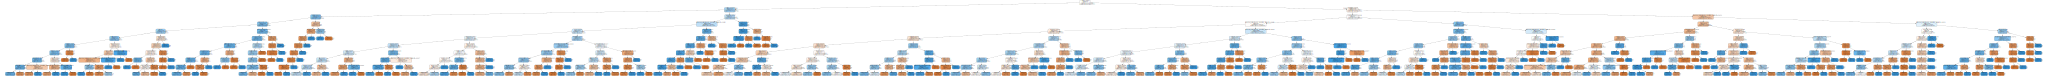

In [0]:
# Please write all the code with proper documentation
#https://scikit-learn.org/stable/modules/tree.html
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(dt, out_file=None, 
                       
                     filled=True, rounded=True,feature_names= feature_names_tfidf,
                    special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight = 'balanced',min_samples_leaf=5)
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split':[5,10,100,500]}
clf = GridSearchCV(dt, parameters, cv=3, return_train_score=True, scoring='roc_auc', n_jobs=-1,verbose=10)
clf.fit(X_3tr, y_train)

results_3 = pd.DataFrame.from_dict(clf.cv_results_)
results_3 = results_3.sort_values(['param_max_depth'])



Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 53.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 71.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 100.5min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed: 108.5min finished


In [0]:
results_3.head()

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0      15.722598      0.497818  ...          0.549673         0.000195
1      14.918759      0.796887  ...          0.549673         0.000195
2      14.574401      0.514029  ...          0.549673         0.000195
3      14.261808      0.185411  ...          0.549673         0.000195
4      64.183394      1.226244  ...          0.655055         0.001332

[5 rows x 18 columns]

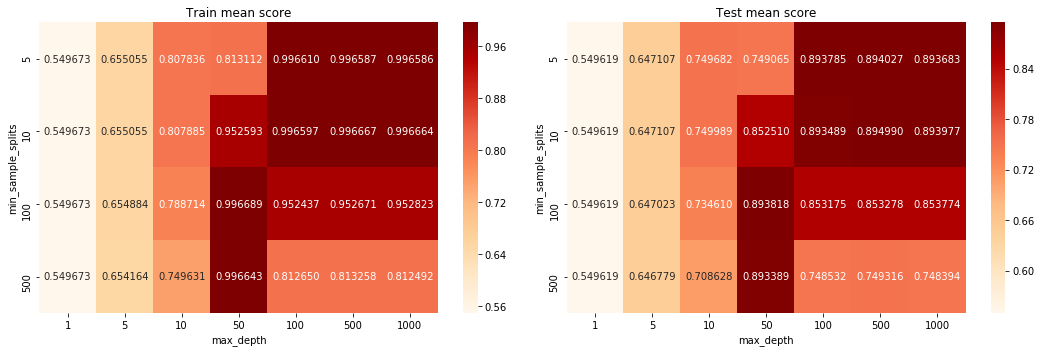

In [0]:
tr3_auc = np.asarray(results_3['mean_train_score']).reshape(7,4).T
te3_auc = np.asarray(results_3['mean_test_score']).reshape(7,4).T
max_depth=[1, 5, 10, 50, 100, 500, 1000]
min_samples_split=[5,10,100,500]

f, axes = plt.subplots(1, 2,figsize=(15,5))

sns.heatmap(tr3_auc, annot=True,square=False,cbar=True,cmap='OrRd',fmt='f',xticklabels=max_depth, yticklabels=min_samples_split,ax=axes[0])
sns.heatmap(te3_auc, annot=True,square=False,cbar=True,cmap='OrRd',fmt='f',xticklabels=max_depth, yticklabels=min_samples_split,ax=axes[1])

axes[0].set_title('Train mean score')
axes[1].set_title('Test mean score')

axes[0].set(xlabel='max_depth', ylabel='min_sample_splits')
axes[1].set(xlabel='max_depth', ylabel='min_sample_splits')

plt.tight_layout()

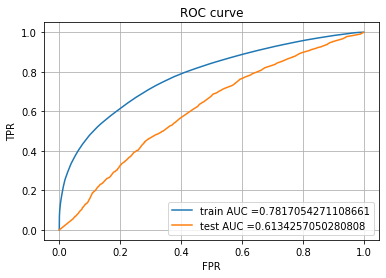

In [0]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
best_d3=10
best_s3=100

dt = DecisionTreeClassifier(max_depth = best_d3, min_samples_split = best_s3, class_weight = 'balanced')
dt.fit(X_3tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(dt, X_3tr)    
y_test_pred = batch_predict(dt, X_3te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

auc3=str(auc(test_fpr, test_tpr))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.5021786668757507 for threshold 0.488


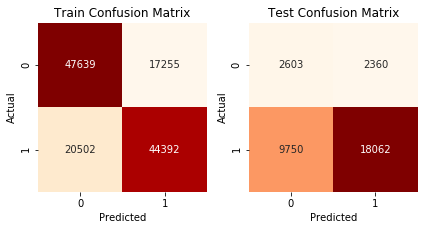

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

tr_cm = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
te_cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://seaborn.pydata.org/examples/distplot_options.html
#https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html

f, axes = plt.subplots(1, 2)

sns.heatmap(tr_cm, annot=True,square=True,cbar=False,cmap='OrRd',fmt="d", ax=axes[0])
sns.heatmap(te_cm, annot=True,square=True,cbar=False,cmap='OrRd',fmt="d", ax=axes[1])
axes[0].set_title('Train Confusion Matrix')
axes[1].set_title('Test Confusion Matrix')

axes[0].set(xlabel='Predicted', ylabel='Actual')
axes[1].set(xlabel='Predicted', ylabel='Actual')

plt.tight_layout()

In [0]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.vstack.html

from scipy.sparse import coo_matrix, vstack

print("Number of false positive points :", te_cm[0][1])
pred =  np.asarray(predict_with_best_t(y_test_pred, best_t)) #Predicting Test data
a=np.array([y_test,pred])                                    #Combine and convert to array the actual values and predicted values
print(a.shape)
fp_data=[]

for i in range(a.shape[1]):
  if (a[0][i] == 0 and a[1][i] == 1):
    fp_data.append(X_3te[i].todense())                      #Stacking all the false positive data points

fp_data=np.asarray(fp_data)
#https://stackoverflow.com/questions/45257971/how-to-reduce-a-3-dim-numpy-array-to-2-dim
fp_data=np.asarray(fp_data.reshape(-1, fp_data.shape[-1]))
print("shape of False positive data points -",fp_data.shape)


Number of false positive points : 2360
(2, 32775)
shape of False positive data points - (2360, 701)


#### Box Plot of Price

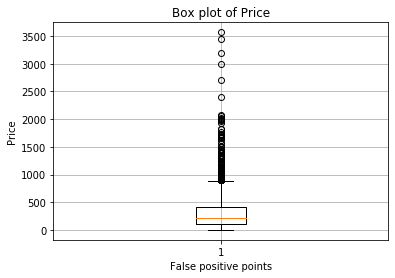

In [0]:
#Inverse transform of standard scalar to get original values
price_in = np.floor(price_scalar.inverse_transform(fp_data[:,-2]))  #-2 because price column is present in last second column in fp_data

#https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
plt.boxplot(price_in)
plt.title('Box plot of Price')
plt.xlabel('False positive points')
plt.ylabel('Price')
plt.grid()
plt.show()

#### PDF of Teacher Number of previously posted projects

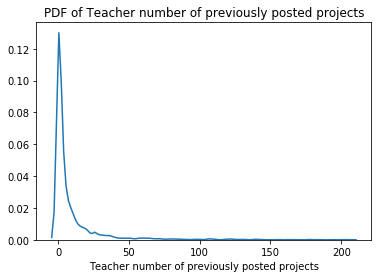

In [0]:
#https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
tp_in = np.floor(tp_scalar.inverse_transform(fp_data[:,-1]))    #-1 for last column in fp_data

sns.distplot(tp_in,hist=False,kde=True)
plt.title('PDF of Teacher number of previously posted projects')
plt.xlabel('Teacher number of previously posted projects')
plt.show()

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [0]:
# Please write all the code with proper documentation

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight = 'balanced',min_samples_leaf=5)
parameters = {'max_depth':[1, 5, 10, 50, 100, 500, 1000], 'min_samples_split':[5,10,100,500]}
clf = GridSearchCV(dt, parameters, cv=3, return_train_score=True, scoring='roc_auc', n_jobs=-1,verbose=10)
clf.fit(X_4tr, y_train)

results_4 = pd.DataFrame.from_dict(clf.cv_results_)
results_4 = results_4.sort_values(['param_max_depth'])



Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 31.7min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 56.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 74.2min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 104.4min
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed: 112.7min finished


In [0]:
results_4.head()

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0      16.354861      0.184862  ...          0.554447         0.008842
1      15.234751      1.167957  ...          0.554447         0.008842
2      14.109908      0.200426  ...          0.554447         0.008842
3      14.318200      0.253049  ...          0.554447         0.008842
4      62.760513      0.144190  ...          0.661181         0.001751

[5 rows x 18 columns]

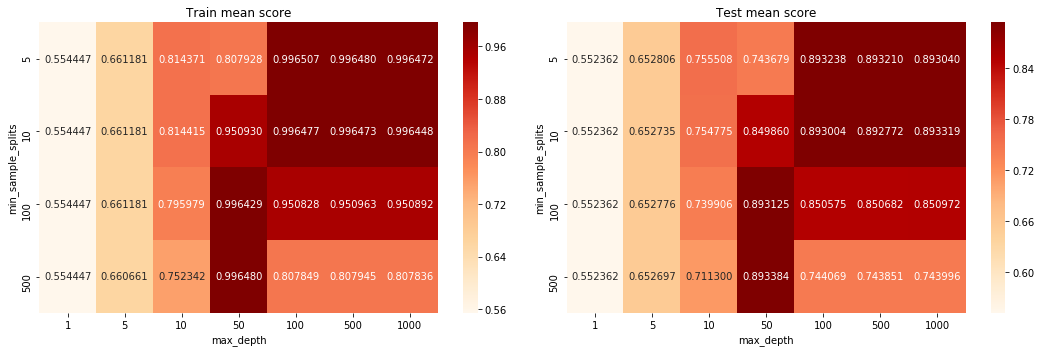

In [0]:
tr4_auc = np.asarray(results_4['mean_train_score']).reshape(7,4).T
te4_auc = np.asarray(results_4['mean_test_score']).reshape(7,4).T
max_depth=[1, 5, 10, 50, 100, 500, 1000]
min_samples_split=[5,10,100,500]

f, axes = plt.subplots(1, 2,figsize=(15,5))

sns.heatmap(tr4_auc, annot=True,square=False,cbar=True,cmap='OrRd',fmt='f',xticklabels=max_depth, yticklabels=min_samples_split,ax=axes[0])
sns.heatmap(te4_auc, annot=True,square=False,cbar=True,cmap='OrRd',fmt='f',xticklabels=max_depth, yticklabels=min_samples_split,ax=axes[1])

axes[0].set_title('Train mean score')
axes[1].set_title('Test mean score')

axes[0].set(xlabel='max_depth', ylabel='min_sample_splits')
axes[1].set(xlabel='max_depth', ylabel='min_sample_splits')

plt.tight_layout()

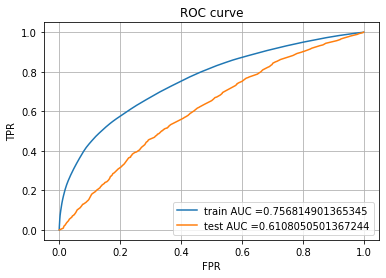

In [0]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
best_d4=10
best_s4=500

dt = DecisionTreeClassifier(max_depth = best_d4, min_samples_split = best_s4, class_weight = 'balanced')
dt.fit(X_4tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(dt, X_4tr)    
y_test_pred = batch_predict(dt, X_4te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

auc4=str(auc(test_fpr, test_tpr))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.4708369678325591 for threshold 0.475


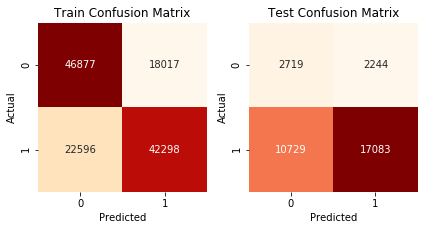

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

tr_cm = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
te_cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://seaborn.pydata.org/examples/distplot_options.html
#https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html

f, axes = plt.subplots(1, 2)

sns.heatmap(tr_cm, annot=True,square=True,cbar=False,cmap='OrRd',fmt="d", ax=axes[0])
sns.heatmap(te_cm, annot=True,square=True,cbar=False,cmap='OrRd',fmt="d", ax=axes[1])
axes[0].set_title('Train Confusion Matrix')
axes[1].set_title('Test Confusion Matrix')

axes[0].set(xlabel='Predicted', ylabel='Actual')
axes[1].set(xlabel='Predicted', ylabel='Actual')

plt.tight_layout()

In [0]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.vstack.html

from scipy.sparse import coo_matrix, vstack

print("Number of false positive points :", te_cm[0][1])
pred =  np.asarray(predict_with_best_t(y_test_pred, best_t)) #Predicting Test data
a=np.array([y_test,pred])                                    #Combine and convert to array the actual values and predicted values
print(a.shape)
fp_data=[]

for i in range(a.shape[1]):
  if (a[0][i] == 0 and a[1][i] == 1):
    fp_data.append(X_4te[i].todense())                      #Stacking all the false positive data points

fp_data=np.asarray(fp_data)
#https://stackoverflow.com/questions/45257971/how-to-reduce-a-3-dim-numpy-array-to-2-dim
fp_data=np.asarray(fp_data.reshape(-1, fp_data.shape[-1]))
print("shape of False positive data points -",fp_data.shape)


Number of false positive points : 2244
(2, 32775)
shape of False positive data points - (2244, 701)


#### Box Plot of Price

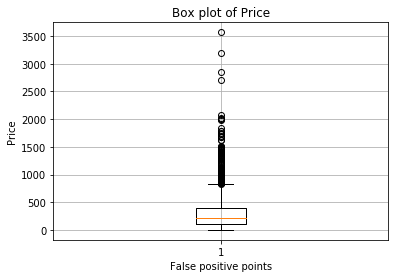

In [0]:
#Inverse transform of standard scalar to get original values
price_in = np.floor(price_scalar.inverse_transform(fp_data[:,-2]))  #-2 because price column is present in last second column in fp_data

#https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
plt.boxplot(price_in)
plt.title('Box plot of Price')
plt.xlabel('False positive points')
plt.ylabel('Price')
plt.grid()
plt.show()

#### PDF of Teacher Number of previously posted projects

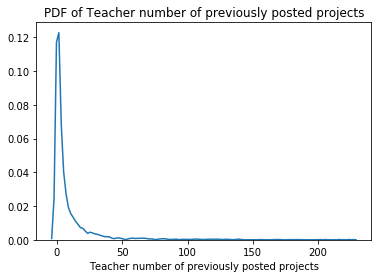

In [0]:
#https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
tp_in = np.floor(tp_scalar.inverse_transform(fp_data[:,-1]))    #-1 for last column in fp_data

sns.distplot(tp_in,hist=False,kde=True)
plt.title('PDF of Teacher number of previously posted projects')
plt.xlabel('Teacher number of previously posted projects')
plt.show()

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logR = LogisticRegression(penalty='l2', class_weight = 'balanced', n_jobs=-1)
parameters = {'C':[0.00001, 0.0001, 0.001, 0.01, 0.1,1]}
clf = GridSearchCV(logR, parameters, cv=3, return_train_score=True, scoring='roc_auc', n_jobs=-1,verbose=10)
clf.fit(X_5tr, y_train)

results_5 = pd.DataFrame.from_dict(clf.cv_results_)
results_5 = results_5.sort_values(['param_C'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:   28.1s remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   35.2s remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.0min finished


In [0]:
results_5.head()

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0       1.771309      0.031130  ...          0.617438         0.000971
1       2.410953      0.107679  ...          0.620501         0.000755
2       4.038600      0.355268  ...          0.641607         0.000537
3       9.170303      0.221585  ...          0.710778         0.000381
4      17.457377      0.372867  ...          0.777582         0.000325

[5 rows x 17 columns]

In [0]:
train_auc = np.asarray(results_5['mean_train_score'])
cv_auc = np.asarray(results_5['mean_test_score'])

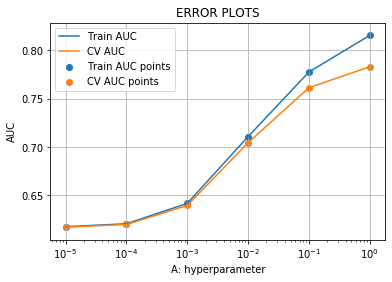

In [0]:

A=[0.00001, 0.0001, 0.001, 0.01, 0.1,1]
plt.plot(A, train_auc, label='Train AUC')
plt.plot(A, cv_auc, label='CV AUC')

plt.scatter(A, train_auc, label='Train AUC points')
plt.scatter(A, cv_auc, label='CV AUC points')
plt.xscale('log')
plt.legend()
plt.xlabel("A: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

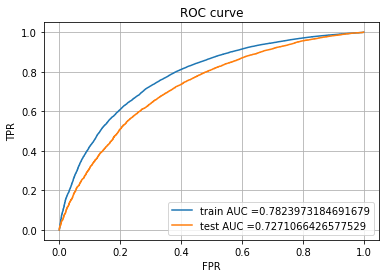

In [0]:
best_c5=0.1

logR = LogisticRegression(penalty='l2', C=best_c5, class_weight= 'balanced' ,n_jobs=-1)
logR.fit(X_5tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(logR, X_5tr)    
y_test_pred = batch_predict(logR, X_5te)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

auc5=str(auc(test_fpr, test_tpr))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.5111411293682758 for threshold 0.493


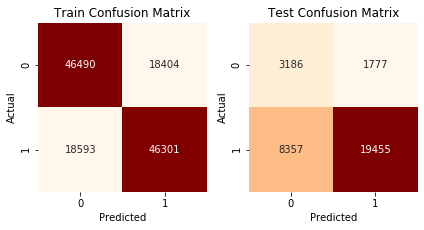

In [0]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

tr_cm = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t))
te_cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://seaborn.pydata.org/examples/distplot_options.html
#https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html

f, axes = plt.subplots(1, 2)

sns.heatmap(tr_cm, annot=True,square=True,cbar=False,cmap='OrRd',fmt="d", ax=axes[0])
sns.heatmap(te_cm, annot=True,square=True,cbar=False,cmap='OrRd',fmt="d", ax=axes[1])
axes[0].set_title('Train Confusion Matrix')
axes[1].set_title('Test Confusion Matrix')

axes[0].set(xlabel='Predicted', ylabel='Actual')
axes[1].set(xlabel='Predicted', ylabel='Actual')

plt.tight_layout()

<h1>3. Conclusion</h1>

In [0]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
    
x = PrettyTable()
y = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Max-depth","Min-Sample-split", "AUC"]

x.add_row(["BOW", "Decision Tree", best_d1,best_s1, auc1])
x.add_row(["TF-IDF", "Decision Tree", best_d2,best_s2, auc2])
x.add_row(["Avg W2V", "Decision Tree", best_d3,best_s3, auc3])
x.add_row(["TF-IDF W2V", "Decision Tree", best_d4,best_s4, auc4])


y.field_names = ["Vectorizer", "Model", "Best Alpha", "AUC"]
y.add_row(["TF-IDF:Top 5000", "Logistic Regression", best_c5, auc5])

print(x)
print(y)

+------------+---------------+-----------+------------------+--------------------+
| Vectorizer |     Model     | Max-depth | Min-Sample-split |        AUC         |
+------------+---------------+-----------+------------------+--------------------+
|    BOW     | Decision Tree |     10    |        10        | 0.6518814410008142 |
|   TF-IDF   | Decision Tree |     10    |        5         | 0.6510394595832546 |
|  Avg W2V   | Decision Tree |     10    |       100        | 0.6134257050280808 |
| TF-IDF W2V | Decision Tree |     10    |       500        | 0.6108050501367244 |
+------------+---------------+-----------+------------------+--------------------+
+-----------------+---------------------+------------+--------------------+
|    Vectorizer   |        Model        | Best Alpha |        AUC         |
+-----------------+---------------------+------------+--------------------+
| TF-IDF:Top 5000 | Logistic Regression |    0.1     | 0.7271066426577529 |
+-----------------+-------------